Lets Load the data

In [ ]:
#Churn prediction in telecom.
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
!gdown 1uUt7uL-VuF_5cpodYRiriEwhsldeEp3m

Downloading...
From: https://drive.google.com/uc?id=1uUt7uL-VuF_5cpodYRiriEwhsldeEp3m
To: /content/churn_logistic.csv
100% 494k/494k [00:00<00:00, 127MB/s]


In [ ]:
import pandas as pd
churn = pd.read_csv("churn_logistic.csv")
churn.head()

Account Length  VMail Message  Day Mins  Eve Mins  Night Mins  Intl Mins  \
0             128             25     265.1     197.4       244.7       10.0   
1             107             26     161.6     195.5       254.4       13.7   
2             137              0     243.4     121.2       162.6       12.2   
3              84              0     299.4      61.9       196.9        6.6   
4              75              0     166.7     148.3       186.9       10.1   

   CustServ Calls  Intl Plan  VMail Plan  Day Calls  ...  Eve Calls  \
0               1          0           1        110  ...         99   
1               1          0           1        123  ...        103   
2               0          0           0        114  ...        110   
3               2          1           0         71  ...         88   
4               3          1           0        113  ...        122   

   Eve Charge  Night Calls  Night Charge  Intl Calls  Intl Charge  State  \
0       16.78           91         11.01           3         2.70     KS   
1       16.62          103         11.45           3         3.70     OH   
2       10.30          104          7.32           5         3.29     NJ   
3        5.26           89          8.86           7         1.78     OH   
4       12.61          121          8.41           3         2.73     OK   

  Area Code     Phone Churn  
0       415  382-4657     0  
1       415  371-7191     0  
2       415  358-1921     0  
3       408  375-9999     0  
4       415  330-6626     0  

[5 rows x 21 columns]

**Data Description**
<center>

| Records | Features |
| :-- | :-- |
| 5700 | 21 |


| Id | Features | Description |
| :-- | :--| :--|
|01| **state** | 2-letter code of the US state of customer residence|
|02| **account_length** | Number of months the customer has been with the current telco provider |
|03|**area_code**|string="area_code_AAA" where AAA = 3 digit area code|
|04|**intl_plan**|The customer has international plan|
|05|**vmail_plan**| The customer has voice mail plan|
|06|**vmail_messages**|Number of voice-mail messages|
|07|**day_mins**|Total minutes of day calls|
|08|**day_calls**|Total no of day calls|
|09|**day_charge**|Total charge of day calls|
|10|**eve_mins**|Total minutes of evening calls|
|11|**eve_calls**|Total no of evening calls|
|12|**eve_charge**|Total charge of evening calls|
|13|**night_mins**|Total minutes of night calls|
|14|**night_calls**|Total no of night calls|
|15|**night_charge**|Total charge of night calls|
|16|**intl_mins**|Total minutes of international calls|
|17|**intl_calls**|Total no of international calls|
|18|**intl_charge**|Total charge of international calls|
|19|**customer_service_calls**|Number of calls to customer service|
|20|**phone**|10 digit number|
|21|**churn**|Customer churn - target variable|

Lets see the number of samples when $y=0$ and $y=1$

In [ ]:
churn["Churn"].value_counts()

0    2850
1    2850
Name: Churn, dtype: int64

**Observe**

The samples for both the values of $y$ are same
- Showing that the data is balanced or have equal number of samples for both the cases




Now lets see how each feature is effective in predicting Churn or Not by performing a univariate EDA


<Axes: xlabel='Churn', ylabel='Day Mins'>

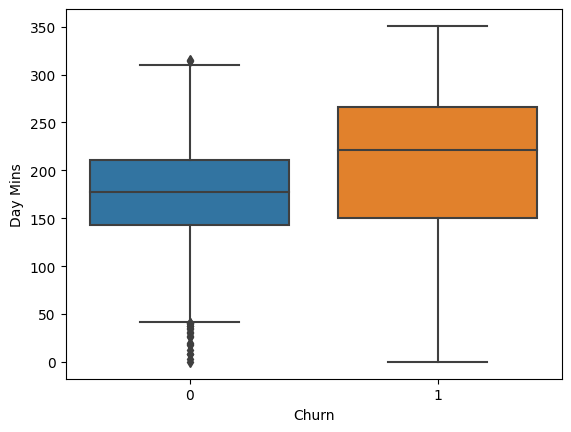

In [ ]:
import seaborn as sns
sns.boxplot(x='Churn', y='Day Mins', data = churn)

- Notice how we use feature ```Day Mins``` to check if it is significant or not

#### What can we see from the boxplot ?
- The churned custmors have a higher median for  Day Mins than not churned customers which means:
- Customer who spent more time calling in a day tend to churn

this shows, ```Days Mins``` is an important feature



Now, let's see if there is any other feature which has collinearity with ```Days Mins```

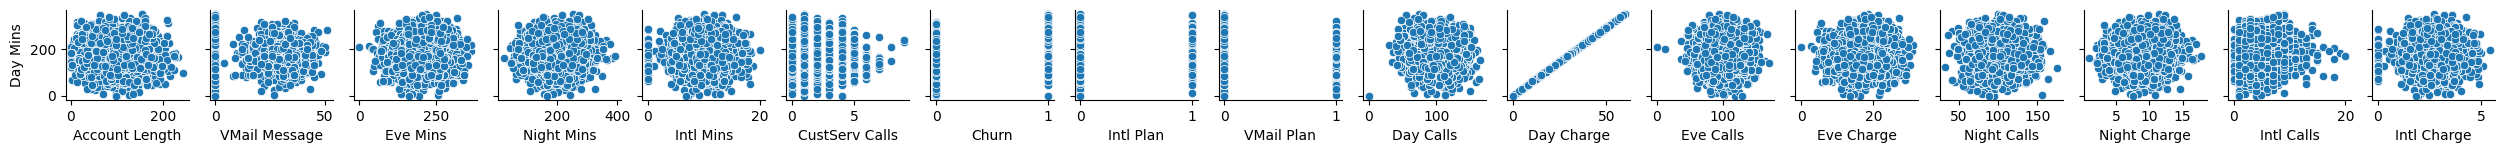

In [ ]:
sns.pairplot(data=churn, y_vars=["Day Mins"], x_vars=['Account Length', 'VMail Message' , 'Eve Mins', 'Night Mins',
       'Intl Mins', 'CustServ Calls', 'Churn', 'Intl Plan', 'VMail Plan',
       'Day Calls', 'Day Charge', 'Eve Calls', 'Eve Charge', 'Night Calls',
       'Night Charge', 'Intl Calls', 'Intl Charge'], height=1.5, aspect=1)
plt.show()

#### Can we say which feature is highly correlated with ```Days Mins``` ?
- Day Charge is highly correlated
- Hence we will just drop either one of them


Now lets see another feature ``` Account Length```

<Axes: xlabel='Churn', ylabel='Account Length'>

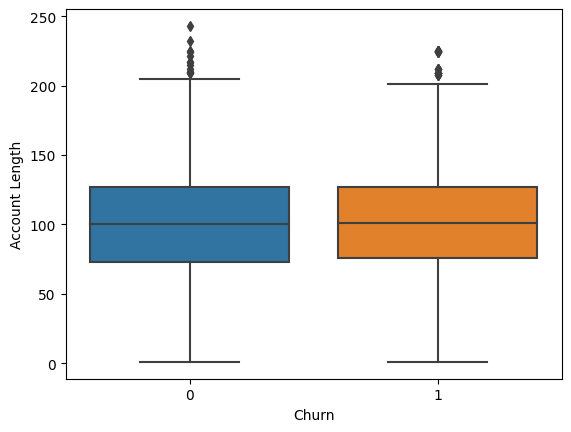

In [ ]:
sns.boxplot(x = 'Churn', y= 'Account Length', data = churn)

#### Does the Account Length feature relevant ?
- If we see median for both, its quite similar
- Hence this feature does not have any signficance and can be dropped


Let's plot few more boxplots and check for outliers too

<Axes: xlabel='Churn', ylabel='Eve Mins'>

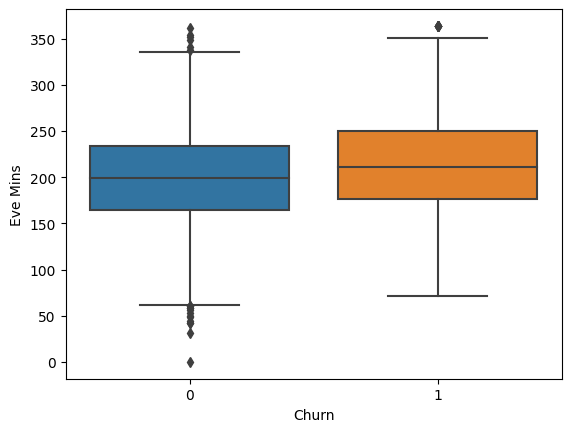

In [ ]:
sns.boxplot(x = 'Churn', y= 'Eve Mins', data = churn)

<Axes: xlabel='Churn', ylabel='Intl Plan'>

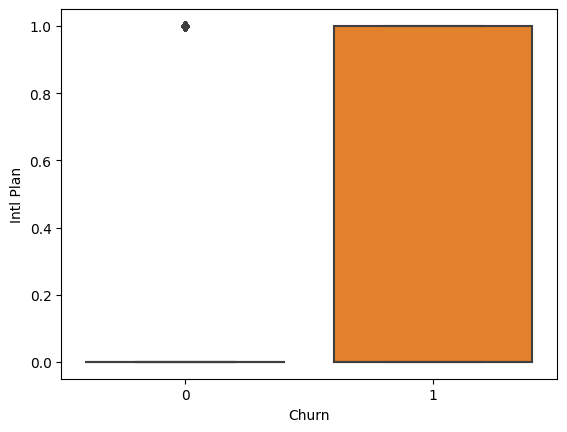

In [ ]:
sns.boxplot(x = 'Churn', y= 'Intl Plan', data = churn)

Notice how this feature is completely inclined towards one, hence we will not be taking this feature

<Axes: xlabel='Churn', ylabel='CustServ Calls'>

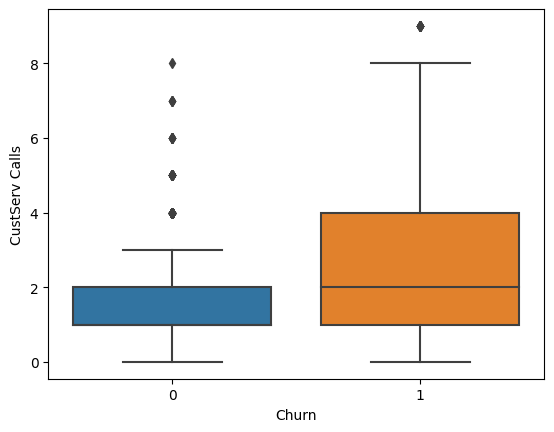

In [ ]:
sns.boxplot(x = 'Churn', y= 'CustServ Calls', data = churn)

<Axes: xlabel='Churn', ylabel='VMail Message'>

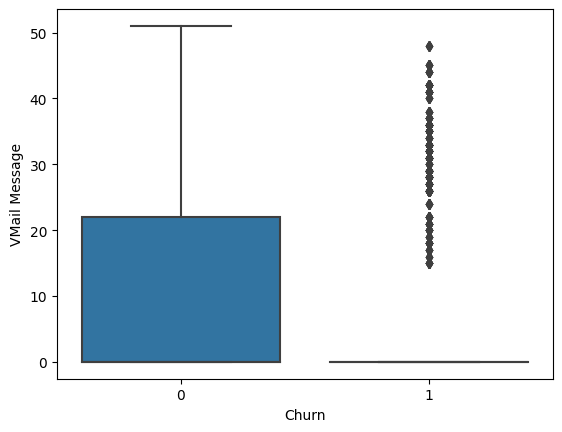

In [ ]:
sns.boxplot(x='Churn', y='VMail Message', data=churn)

Again, notice here how there are a lot of outliers for label 1. Hence we will not be taking this feature

<Axes: xlabel='Churn', ylabel='Night Mins'>

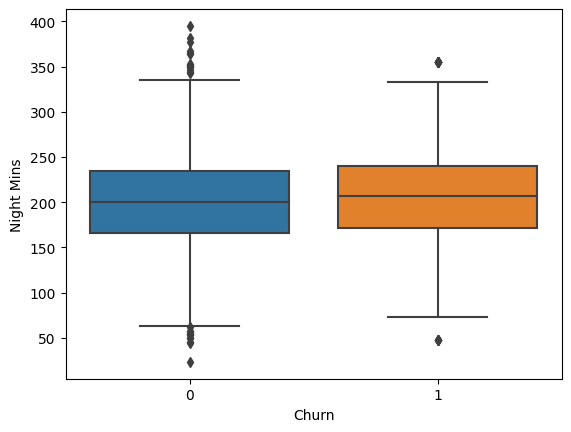

In [ ]:
sns.boxplot(x='Churn', y='Night Mins', data=churn)

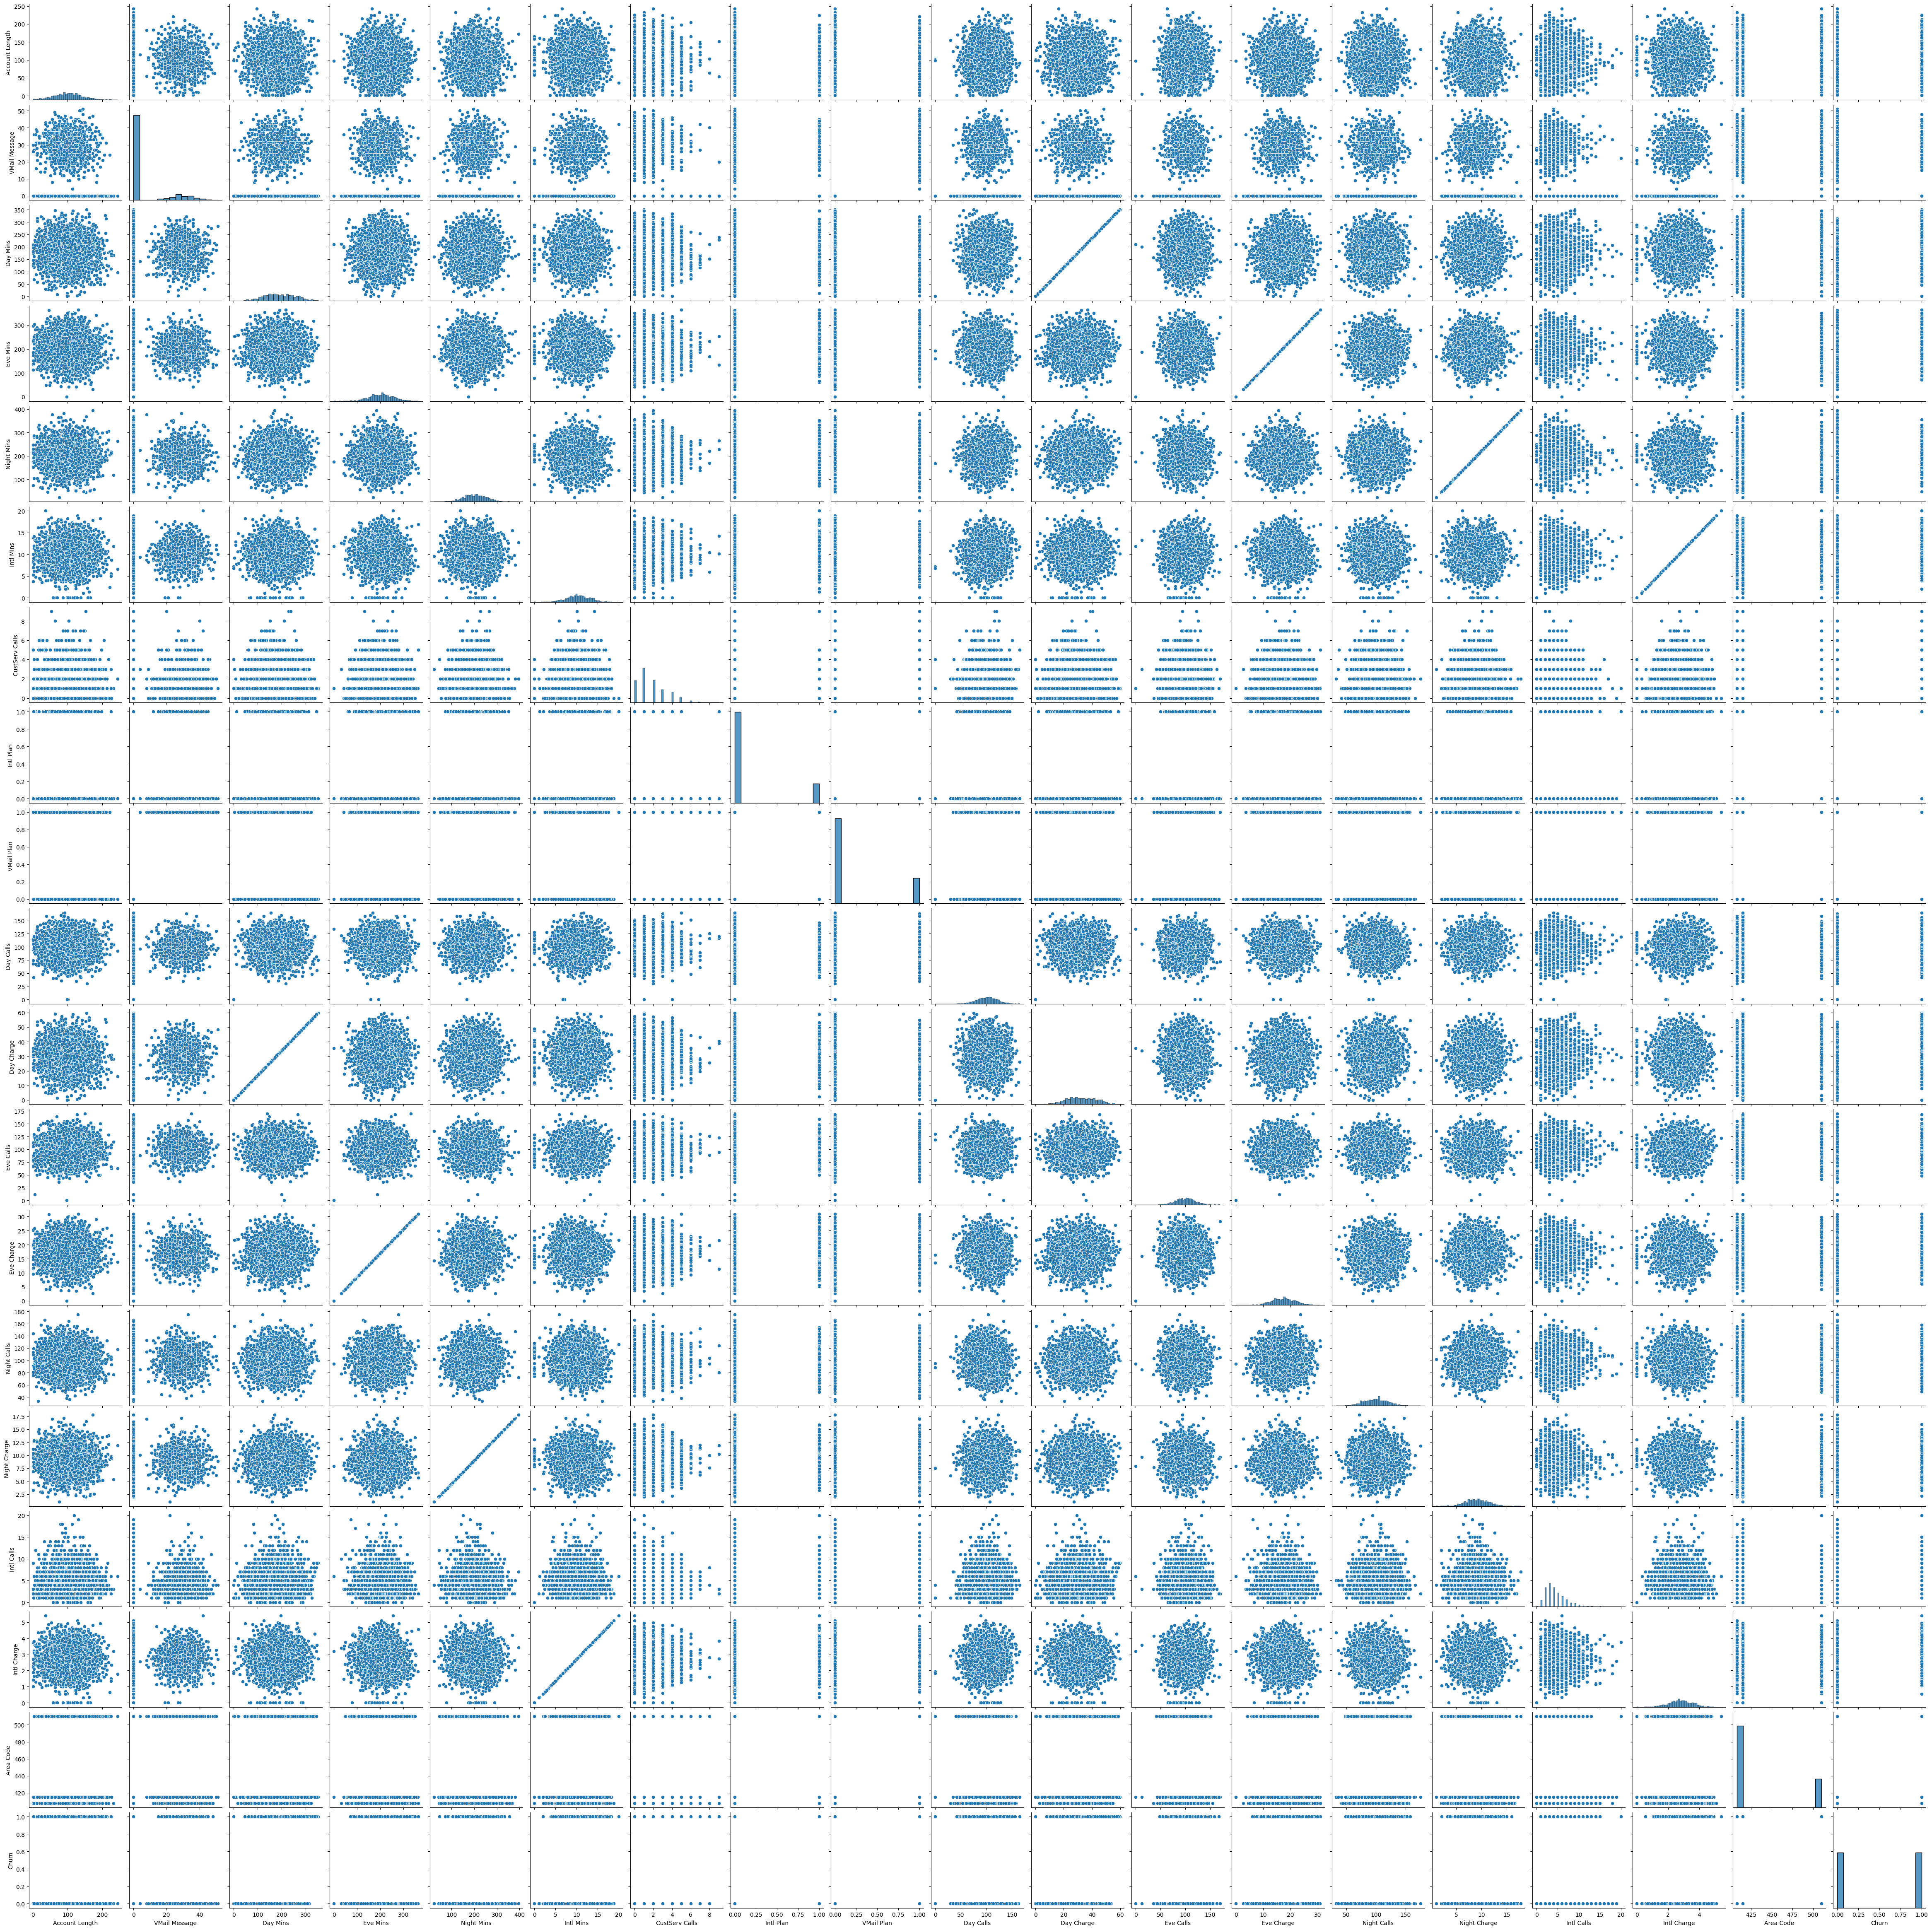

In [ ]:
sns.pairplot(data=churn)

Notice how,

- Day Charge and Day Mins are correlated completely
- Similar for Night Charge and Night Mins, and Eve Charge and Eve Mins
- We will be taking one of these features each
- We will also be taking few more features such as "Account Length" and "CustServ Calls"


This was a very basic level EDA to choose which features to choose for our LogisticRegression model. You can do your own analysis and try to apply more techniques of feature selection